# Zimp Word Count Analysis
How much do different tokenizers diverge?

In [1]:
import pandas as pd
import numpy as np
import os
import logging
import matplotlib.pyplot as plt
import time
from zimp.pos.tokenization.builder import TokenizerStrategy
from zimp.pos.wordcount_analyzer import WordCountAnalyzer
from glob import glob

plt.style.use('seaborn-whitegrid')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Martin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Martin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package perluniprops to
[nltk_data]     C:\Users\Martin\AppData\Roaming\nltk_data...
[nltk_data]   Package perluniprops is already up-to-date!


In [2]:
source_dir = '../../zimp_orchestrator/orch/resources'
files = {}

In [3]:
for ds_path in glob(source_dir + '/*'):
    if not os.path.isdir(ds_path):
        continue
    ds_name = os.path.basename(ds_path)
    files[ds_name] = [os.path.join(ds_path, 'train.csv'), os.path.join(ds_path, 'test.csv')]

In [4]:
def get_ds_stats(ds_name, paths, wca_builder, track_name):
    texts = pd.read_csv(paths[0]).text.append(pd.read_csv(paths[1]).text)
    start_time = time.process_time()
    df =  wca_builder(texts).extract_dataset_metric().rename(columns={'count': track_name})
    print(f"{ds_name} with {track_name} took {time.process_time()-start_time}s")
    return df

In [5]:
def cropped_line_plot(df, dataset):
    
    if max(df.index) > 250:
        # remove all values above 95-percentile
        cs = df.sum(axis=1).cumsum()
        max_idx = min(max(cs[cs< cs.iloc[-1]*.95].idxmax(),200), df.index.max())
        df_plot = df[df.index <= max_idx]
        # resample to 100 equal-size intervals
        df_plot = df_plot.groupby(pd.cut(df_plot.index, 100))\
            .agg(lambda s: s.sum())\
            .rename(lambda idx: max(idx.left, 0))\
            .fillna(0)
    else:
        df_plot = df
    
    df_plot.plot(
        figsize=(10,5),
        color=plt.cm.jet(np.linspace(0, 1, len(df_plot.columns))),
        alpha=.5,
        title=f'Number of words per observation ({dataset})',
        xlabel='Number of words',
        ylabel='Frequency'
    )
    
    plt.savefig(f'tokenizer_compare/barchart_{dataset}.pdf')
    plt.show()

In [6]:
def violin_plot(df, dataset):
    
    if len(df.index) > 250:
        # remove all values above 98-percentile
        cs = df.sum(axis=1).cumsum()
        df_plot = df[cs< cs.iloc[-1]*.98]
    else:
        df_plot = df
        
    fig, axes = plt.subplots(figsize=(15,5))

    v_parts = axes.violinplot(dataset = [df_plot.index.repeat(df_plot[col].fillna(0)) for col in df_plot.columns], showmedians=True)

    colors=plt.cm.jet(np.linspace(0, 1, len(df.columns)))

    for partname in ('cbars','cmins','cmaxes','cmedians'):
        vp = v_parts[partname]
        vp.set_edgecolor('#000000')
        vp.set_linewidth(.5 if partname == 'cbars' else 1)
        vp.set_alpha(.5 if partname == 'cbars' else 1)

    # Make the violin body blue with a red border:
    for idx, vp in enumerate(v_parts['bodies']):
        vp.set_facecolor(colors[idx])
        vp.set_edgecolor(colors[idx])
        vp.set_linewidth(1)
        vp.set_alpha(0.5)

    axes.set_title(f'Word Count per strategy  ({dataset})')
    axes.yaxis.grid(True)
    axes.set_xlabel('Strategy')
    axes.set_ylabel('Count of Words')
    axes.set_xticks(np.arange(1, len(df_plot.columns) + 1), labels=df_plot.columns, fontsize=8)
    
    plt.savefig(f'tokenizer_compare/violinplot_{dataset}.pdf')
    plt.show()

10K-GNAD with REGEX took 1.984375s
10K-GNAD with PYTHON took 0.453125s
10K-GNAD with NLTK_BASE took 50.921875s
10K-GNAD with WORD_PUNKT took 2.0625s
10K-GNAD with NLTK_TWEET took 33.328125s
10K-GNAD with NLTK_NIST took 12.65625s
10K-GNAD with SPACY took 32.9375s
10K-GNAD with GENSIM took 5.296875s
10K-GNAD with NLTK_BASE_GER took 43.5625s
10K-GNAD with SPACY_GER took 28.078125s


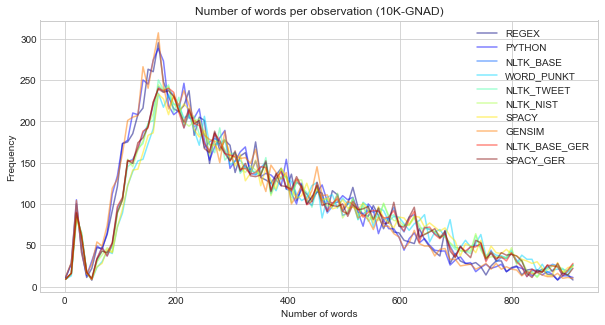

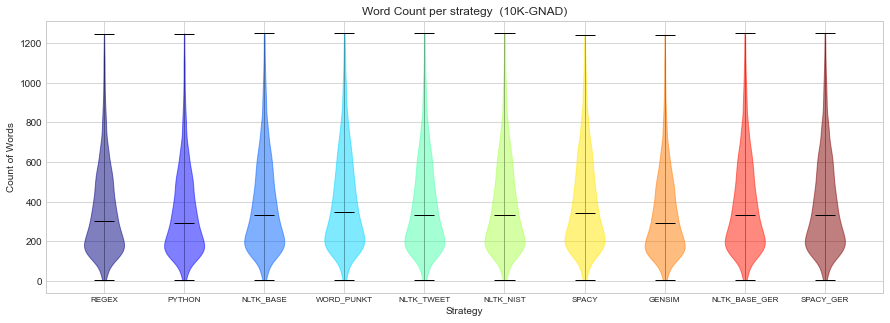

DBP-14 with REGEX took 16.0625s
DBP-14 with PYTHON took 3.40625s
DBP-14 with NLTK_BASE took 302.0625s
DBP-14 with WORD_PUNKT took 17.234375s
DBP-14 with NLTK_TWEET took 249.875s
DBP-14 with NLTK_NIST took 107.28125s
DBP-14 with SPACY took 340.5625s
DBP-14 with GENSIM took 39.734375s
DBP-14 with NLTK_BASE_GER took 305.6875s
DBP-14 with SPACY_GER took 345.15625s


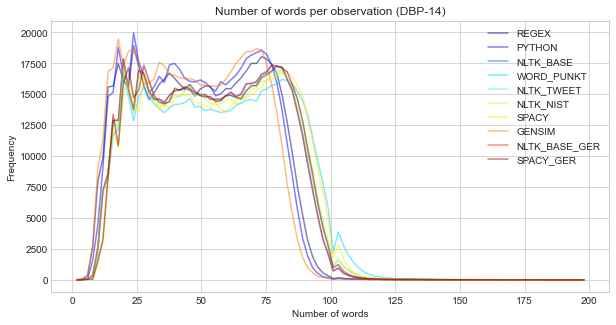

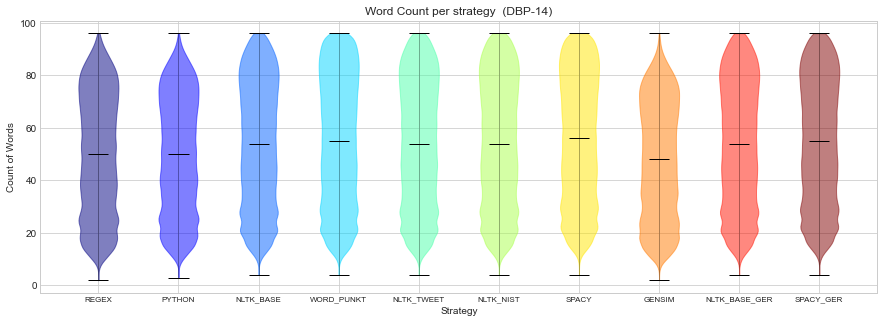

GERMEVAL-2018 with REGEX took 0.09375s
GERMEVAL-2018 with PYTHON took 0.03125s
GERMEVAL-2018 with NLTK_BASE took 2.59375s
GERMEVAL-2018 with WORD_PUNKT took 0.109375s
GERMEVAL-2018 with NLTK_TWEET took 1.390625s
GERMEVAL-2018 with NLTK_NIST took 0.75s
GERMEVAL-2018 with SPACY took 2.859375s
GERMEVAL-2018 with GENSIM took 0.25s
GERMEVAL-2018 with NLTK_BASE_GER took 2.546875s
GERMEVAL-2018 with SPACY_GER took 2.8125s


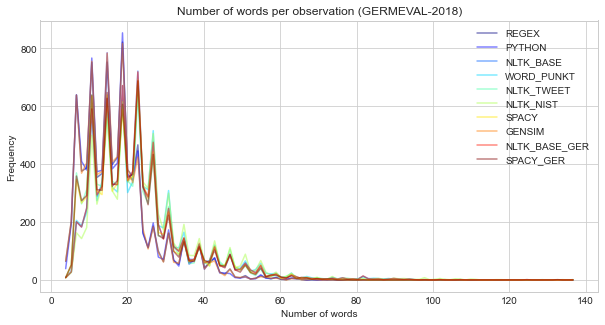

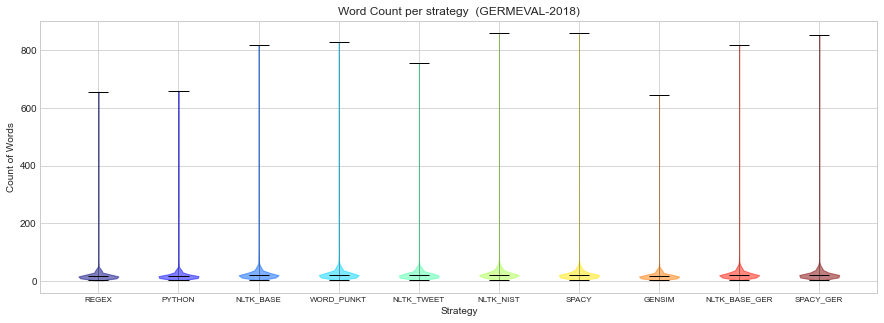

GERMEVAL-2020 with REGEX took 2.234375s
GERMEVAL-2020 with PYTHON took 0.5625s
GERMEVAL-2020 with NLTK_BASE took 50.796875s
GERMEVAL-2020 with WORD_PUNKT took 2.546875s
GERMEVAL-2020 with NLTK_TWEET took 32.28125s
GERMEVAL-2020 with NLTK_NIST took 18.9375s
GERMEVAL-2020 with SPACY took 34.328125s
GERMEVAL-2020 with GENSIM took 5.90625s
GERMEVAL-2020 with NLTK_BASE_GER took 50.796875s
GERMEVAL-2020 with SPACY_GER took 34.328125s


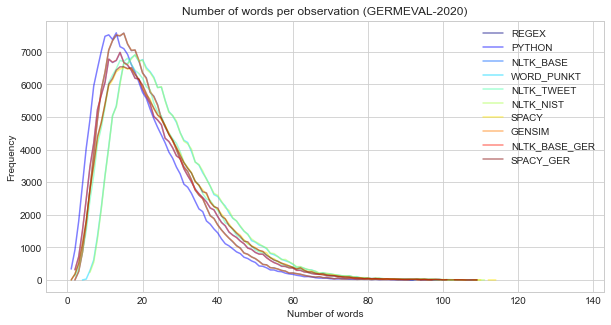

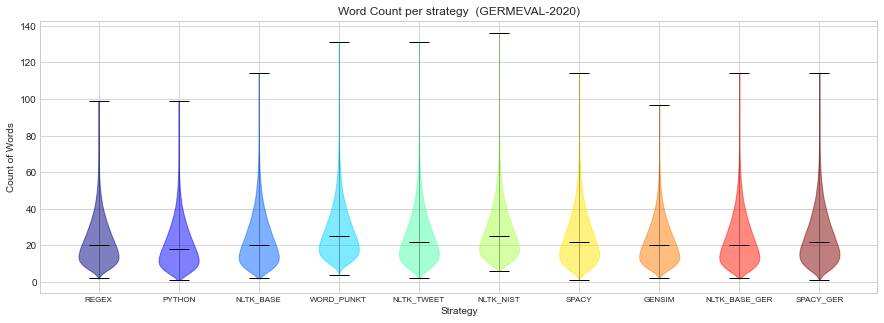

TREC-6 with REGEX took 0.03125s
TREC-6 with PYTHON took 0.015625s
TREC-6 with NLTK_BASE took 0.921875s
TREC-6 with WORD_PUNKT took 0.03125s
TREC-6 with NLTK_TWEET took 0.453125s
TREC-6 with NLTK_NIST took 0.265625s
TREC-6 with SPACY took 1.0s
TREC-6 with GENSIM took 0.09375s
TREC-6 with NLTK_BASE_GER took 0.859375s
TREC-6 with SPACY_GER took 0.875s


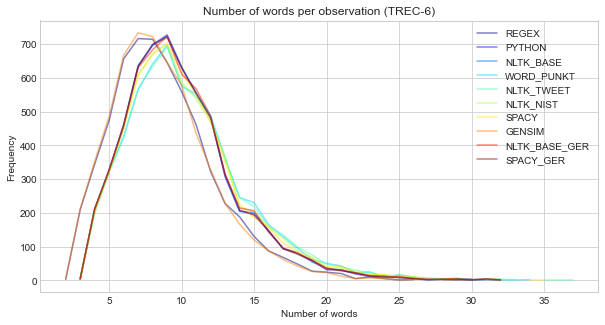

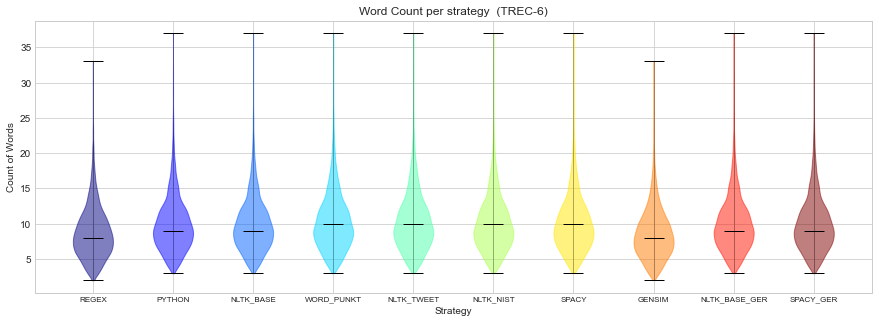

YELP-5 with REGEX took 44.3125s
YELP-5 with PYTHON took 8.4375s
YELP-5 with NLTK_BASE took 970.703125s
YELP-5 with WORD_PUNKT took 50.609375s
YELP-5 with NLTK_TWEET took 711.15625s
YELP-5 with NLTK_NIST took 301.96875s
YELP-5 with SPACY took 373.390625s
YELP-5 with GENSIM took 124.28125s
YELP-5 with NLTK_BASE_GER took 1039.6875s
YELP-5 with SPACY_GER took 356.4375s


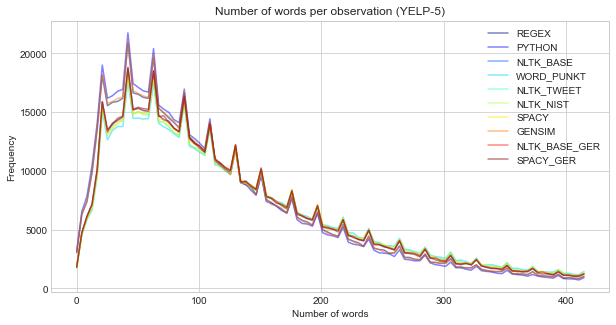

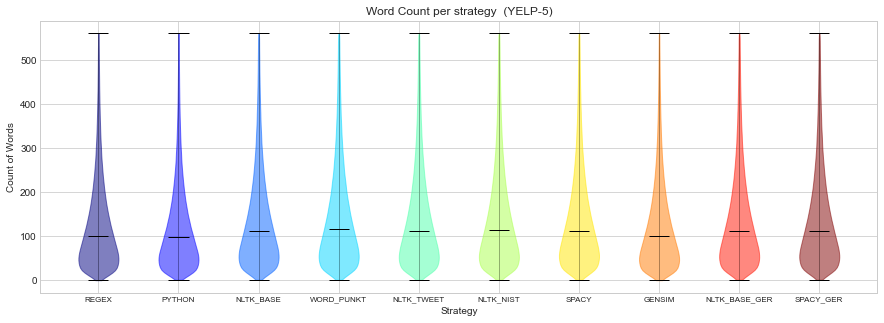

In [7]:
for dataset in files.keys():
    dfs = []
    for strategy in TokenizerStrategy:
        dfs.append(get_ds_stats(dataset, files[dataset], lambda texts: WordCountAnalyzer(texts, strategy=strategy), strategy.name))
    dfs.append(get_ds_stats(dataset, files[dataset], lambda texts: WordCountAnalyzer(texts, strategy=TokenizerStrategy.NLTK_BASE, language='german'), 'NLTK_BASE_GER'))
    dfs.append(get_ds_stats(dataset, files[dataset], lambda texts: WordCountAnalyzer(texts, strategy=TokenizerStrategy.SPACY, language='german'), 'SPACY_GER'))
    df = pd.concat(dfs, axis=1)
    cropped_line_plot(df, dataset)
    violin_plot(df, dataset)
    df.to_csv(f'tokenizer_compare/{dataset}.csv')

### Execution time visualiation
Combine results from all datasets

In [8]:
p_text = """
10K-GNAD with REGEX took 1.984375s
10K-GNAD with PYTHON took 0.453125s
10K-GNAD with NLTK_BASE took 50.921875s
10K-GNAD with WORD_PUNKT took 2.0625s
10K-GNAD with NLTK_TWEET took 33.328125s
10K-GNAD with NLTK_NIST took 12.65625s
10K-GNAD with SPACY took 32.9375s
10K-GNAD with GENSIM took 5.296875s
10K-GNAD with NLTK_BASE_GER took 43.5625s
10K-GNAD with SPACY_GER took 28.078125s
DBP-14 with REGEX took 16.0625s
DBP-14 with PYTHON took 3.40625s
DBP-14 with NLTK_BASE took 302.0625s
DBP-14 with WORD_PUNKT took 17.234375s
DBP-14 with NLTK_TWEET took 249.875s
DBP-14 with NLTK_NIST took 107.28125s
DBP-14 with SPACY took 340.5625s
DBP-14 with GENSIM took 39.734375s
DBP-14 with NLTK_BASE_GER took 305.6875s
DBP-14 with SPACY_GER took 345.15625s
GERMEVAL-2018 with REGEX took 0.09375s
GERMEVAL-2018 with PYTHON took 0.03125s
GERMEVAL-2018 with NLTK_BASE took 2.59375s
GERMEVAL-2018 with WORD_PUNKT took 0.109375s
GERMEVAL-2018 with NLTK_TWEET took 1.390625s
GERMEVAL-2018 with NLTK_NIST took 0.75s
GERMEVAL-2018 with SPACY took 2.859375s
GERMEVAL-2018 with GENSIM took 0.25s
GERMEVAL-2018 with NLTK_BASE_GER took 2.546875s
GERMEVAL-2018 with SPACY_GER took 2.8125s
GERMEVAL-2020 with REGEX took 2.234375s
GERMEVAL-2020 with PYTHON took 0.5625s
GERMEVAL-2020 with NLTK_BASE took 50.796875s
GERMEVAL-2020 with WORD_PUNKT took 2.546875s
GERMEVAL-2020 with NLTK_TWEET took 32.28125s
GERMEVAL-2020 with NLTK_NIST took 18.9375s
GERMEVAL-2020 with SPACY took 34.328125s
GERMEVAL-2020 with GENSIM took 5.90625s
GERMEVAL-2020 with NLTK_BASE_GER took 50.796875s
GERMEVAL-2020 with SPACY_GER took 34.328125s
TREC-6 with REGEX took 0.03125s
TREC-6 with PYTHON took 0.015625s
TREC-6 with NLTK_BASE took 0.921875s
TREC-6 with WORD_PUNKT took 0.03125s
TREC-6 with NLTK_TWEET took 0.453125s
TREC-6 with NLTK_NIST took 0.265625s
TREC-6 with SPACY took 1.0s
TREC-6 with GENSIM took 0.09375s
TREC-6 with NLTK_BASE_GER took 0.859375s
TREC-6 with SPACY_GER took 0.875s
YELP-5 with REGEX took 44.3125s
YELP-5 with PYTHON took 8.4375s
YELP-5 with NLTK_BASE took 970.703125s
YELP-5 with WORD_PUNKT took 50.609375s
YELP-5 with NLTK_TWEET took 711.15625s
YELP-5 with NLTK_NIST took 301.96875s
YELP-5 with SPACY took 373.390625s
YELP-5 with GENSIM took 124.28125s
YELP-5 with NLTK_BASE_GER took 1039.6875s
YELP-5 with SPACY_GER took 356.4375s
"""
p_texts = p_text.split("\n")

In [9]:
p_stats = []
for text in p_texts:
    parts = text.split()
    if len(parts) < 5:
        continue
    p_stats.append({
        'dataset': parts[0],
        'tokenizer': parts[2],
        'time': float(parts[4][:-1])
    })
df_perf = pd.DataFrame(p_stats)

In [10]:
for dataset in df_perf.dataset.unique():
    cnt_observations = pd.read_csv(f'tokenizer_compare/{dataset}.csv', index_col=0).sum(axis=0).max()
    df_perf.loc[df_perf['dataset']==dataset, 'observations'] = cnt_observations
df_perf['obs_per_s'] = df_perf['observations']/df_perf['time']
df_perf

,dataset,tokenizer,time,observations,obs_per_s
0,10K-GNAD,REGEX,1.984375,10273.0,5176.944882
1,10K-GNAD,PYTHON,0.453125,10273.0,22671.448276
2,10K-GNAD,NLTK_BASE,50.921875,10273.0,201.740411
3,10K-GNAD,WORD_PUNKT,2.062500,10273.0,4980.848485
4,10K-GNAD,NLTK_TWEET,33.328125,10273.0,308.238162
5,10K-GNAD,NLTK_NIST,12.656250,10273.0,811.693827
6,10K-GNAD,SPACY,32.937500,10273.0,311.893738
7,10K-GNAD,GENSIM,5.296875,10273.0,1939.445428
8,10K-GNAD,NLTK_BASE_GER,43.562500,10273.0,235.822095
9,10K-GNAD,SPACY_GER,28.078125,10273.0,365.872009


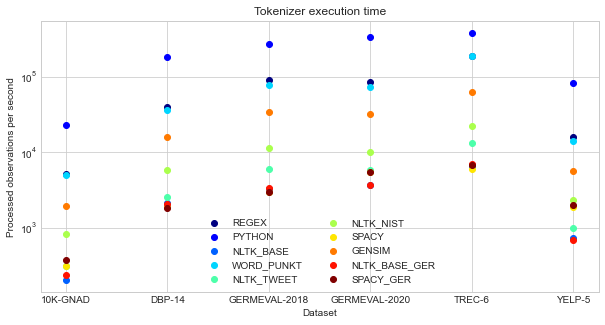

In [11]:
colormap=plt.cm.jet(np.linspace(0, 1, df_perf.tokenizer.nunique()))
fig = plt.figure(figsize=(10,5))
ax = plt.gca()
for col, tokenizer in zip(colormap, df_perf.tokenizer.unique()):
    df_sub = df_perf[df_perf['tokenizer']==tokenizer]
    ax.scatter(x=df_sub.dataset, y=df_sub.obs_per_s, color=col)
ax.set_yscale('log')
ax.legend(df_perf.tokenizer.unique(), loc='lower center', ncol=2)
ax.set_title('Tokenizer execution time')
ax.set_xlabel('Dataset')
ax.set_ylabel('Processed observations per second')
plt.savefig(f'tokenizer_compare/003_execution_time.pdf')
plt.show()

In [12]:
df_perf.groupby('tokenizer')['obs_per_s'].mean()

tokenizer
GENSIM            25398.089778
NLTK_BASE          2734.819303
NLTK_BASE_GER      2816.604825
NLTK_NIST          8758.513139
NLTK_TWEET         4803.541988
PYTHON           212486.238095
REGEX             70752.182612
SPACY              3067.955512
SPACY_GER          3237.590924
WORD_PUNKT        66090.873129
Name: obs_per_s, dtype: float64

In [13]:
from zimp.pos.tokenization.builder import build_tokenizer
txt = "It's okay. it's nothing like Winston-Salem food."
for strategy in TokenizerStrategy:
    print('\\texttt{'+ strategy.name + '} & [' + ', '.join(['\\texttt{'+t+'}' for t in build_tokenizer(strategy, 'english').tokenize_text(txt)]) + '] \\\\')

\texttt{REGEX} & [\texttt{It}, \texttt{s}, \texttt{okay}, \texttt{it}, \texttt{s}, \texttt{nothing}, \texttt{like}, \texttt{Winston}, \texttt{Salem}, \texttt{food}] \\
\texttt{PYTHON} & [\texttt{It's}, \texttt{okay.}, \texttt{it's}, \texttt{nothing}, \texttt{like}, \texttt{Winston-Salem}, \texttt{food.}] \\
\texttt{NLTK_BASE} & [\texttt{It}, \texttt{'s}, \texttt{okay}, \texttt{.}, \texttt{it}, \texttt{'s}, \texttt{nothing}, \texttt{like}, \texttt{Winston-Salem}, \texttt{food}, \texttt{.}] \\
\texttt{WORD_PUNKT} & [\texttt{It}, \texttt{'}, \texttt{s}, \texttt{okay}, \texttt{.}, \texttt{it}, \texttt{'}, \texttt{s}, \texttt{nothing}, \texttt{like}, \texttt{Winston}, \texttt{-}, \texttt{Salem}, \texttt{food}, \texttt{.}] \\
\texttt{NLTK_TWEET} & [\texttt{It's}, \texttt{okay}, \texttt{.}, \texttt{it's}, \texttt{nothing}, \texttt{like}, \texttt{Winston-Salem}, \texttt{food}, \texttt{.}] \\
\texttt{NLTK_NIST} & [\texttt{It's}, \texttt{okay}, \texttt{.}, \texttt{it's}, \texttt{nothing}, \textt